In [1]:
from aequilibrae import Project

from functions.open_states import open_states
from functions.remove_islands import remove_islands
from functions.hex_builder import hex_builder
from functions.zones_with_location import zones_with_location
from functions.zones_with_pop import zones_with_population
from functions.export_hex_population import export_hex_population
from functions.load_hexbins import load_hexbins
from functions.create_clusters import create_clusters
from functions.export_zones import export_zones

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/saturn/share/proj failed


In [2]:
model_fldr = r'../../Andorra'

In [3]:
project = Project()
project.open(model_fldr)

## Let's get all parishes from Andorra

In [4]:
#If you have never analyzed the states in the project country, remove the commentary from the following lines

#country_name = "Andorra"
#states_wkb, dict_of_states = state_borders(country_name)
#export_states_to_project(states, dict_of_states, project)

In [5]:
#Otherwise, if you have already exported states to your project, then continue here
states = open_states(project)
states.head()

,division_name,level,geom
0,Andorra la Vella,1,"MULTIPOLYGON (((1.52056 42.48369, 1.51167 42.4..."
1,Canillo,1,"MULTIPOLYGON (((1.56697 42.54739, 1.57338 42.5..."
2,Encamp,1,"MULTIPOLYGON (((1.72443 42.52080, 1.72445 42.5..."
3,Escaldes-Engordany,1,"MULTIPOLYGON (((1.66318 42.48139, 1.66326 42.4..."
4,La Massana,1,"MULTIPOLYGON (((1.46493 42.50821, 1.46922 42.5..."


## Let's get rid of all islands

In [6]:
#If your country has many islands, and you want to get rid of them, then remove the comentary from the following line and insteade of states, you will continue
#with no_islands
#no_island = remove_islands(states)

In [7]:
#As Andorra has no islands, we can continue with states
mlnd = states.to_crs('epsg:3857')
minx, miny, maxx, maxy = mlnd.unary_union.bounds

## Create Hex Bins

In [8]:
%%time
# size_parameter was determined empirically to not allow any hex bin with more than 10k people and be sufficiently small to allow for clusterings per district
size_parameter = 200
hexb = hex_builder(maxx, minx, maxy, miny, size_parameter, epsg=3857, coverage_area=mlnd)
hexb.to_crs('epsg:4326', inplace=True)
#hexb.shape[0]

Expect 39,984 total hexbins for this bounding box
CPU times: user 1.43 s, sys: 57.8 ms, total: 1.49 s
Wall time: 1.5 s


In [9]:
zones_locations = zones_with_location(hexb, states)

## Compute the population for each HexBin

In [10]:
zones_pop = zones_with_population(project, zones_locations)

In [11]:
zones_pop.head()

,hex_id,division_name,x,y,geometry,population
0,1,La Massana,157489.610691,5.241536e+06,"POLYGON ((1.41372 42.53551, 1.41423 42.53484, ...",0.000000
1,2,La Massana,157489.610691,5.241736e+06,"POLYGON ((1.41372 42.53683, 1.41423 42.53617, ...",0.045473
2,3,La Massana,157489.610691,5.241936e+06,"POLYGON ((1.41372 42.53815, 1.41423 42.53749, ...",0.139696
3,4,La Massana,157489.610691,5.242136e+06,"POLYGON ((1.41372 42.53948, 1.41423 42.53882, ...",0.094683
4,5,La Massana,157489.610691,5.242336e+06,"POLYGON ((1.41372 42.54080, 1.41423 42.54014, ...",0.044415


## Save the model hexbins

In [12]:
#If you have not previously saved your project, uncomment the line below
export_hex_population(project, zones_pop)

## Initializes centroids

In [13]:
hexbins = load_hexbins(project)

<AxesSubplot:>

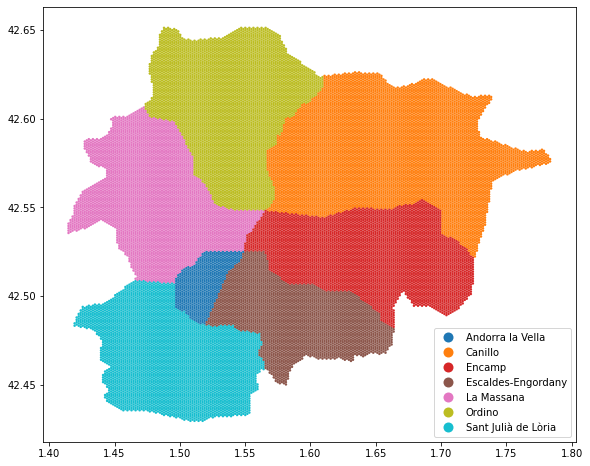

In [14]:
hexbins.plot(column='country_subdivision', legend=True, legend_kwds={'loc': 'lower right'}, figsize=(10,8))

## Create zones

In [15]:
#By default, the function create_clusters already has default values for the parameters max_zone_size and 
#min_zone_size, but the user can change its values if needed.
zoning = create_clusters(hexbins, max_zone_size=9000)

Done 0/7 states


<AxesSubplot:>

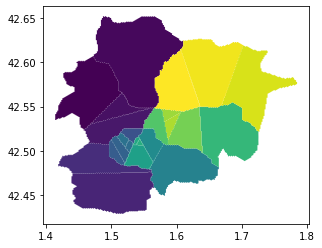

In [16]:
zoning.reset_index().plot(column='zone_id')

## Saves hexbins with zones

In [17]:
export_zones(zoning, project)

/srv/conda/envs/saturn/lib/python3.9/site-packages/aequilibrae-0.7.3-py3.9-linux-x86_64.egg/aequilibrae/project/zone.py:77: UserWarning: Centroid already exists. Failed to create it
  warn("Centroid already exists. Failed to create it")
/srv/conda/envs/saturn/lib/python3.9/site-packages/aequilibrae-0.7.3-py3.9-linux-x86_64.egg/aequilibrae/project/network/connector_creation.py:31: UserWarning: Mode is already connected
  warn("Mode is already connected")
